In [73]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [74]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [75]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [76]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [77]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [78]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [79]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [80]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [81]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [82]:
df["Geography_Germany"] = df["Geography_Germany"].astype(int)

In [83]:
df["Geography_Spain"] = df["Geography_Spain"].astype(int)

In [84]:
df["Gender_Male"] = df["Gender_Male"].astype(int)

In [85]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [86]:
X=df.drop(columns=['Exited'])
y=df['Exited']

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [88]:
X_train.shape

(8000, 11)

In [89]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [90]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [91]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [92]:
model=Sequential() # We are  creating sequential model

In [93]:
model.add(Dense(3,activation='sigmoid',input_dim=11)) # Dense creates layer and creating 3 perceptrons
model.add(Dense(1,activation='sigmoid'))   #11 input columns 

In [94]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 3)                 36        
                                                                 
 dense_9 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [95]:
#Compile the model
model.compile(loss='binary_crossentropy',optimizer='Adam')

In [96]:
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6940
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.5477
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4873
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4627
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4514
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4450
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4406
Epoch 8/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4371
Epoch 9/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4343
Epoch 10/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4320


In [97]:
model.layers[0].get_weights()

[array([[ 0.5286515 , -0.21541792, -0.00959836],
        [-0.35315216,  0.87252235, -1.907557  ],
        [ 0.25230712, -0.28359953, -0.04439452],
        [-0.10434943,  0.16275604, -0.49169782],
        [-0.46773422, -0.04535814, -0.0110933 ],
        [-0.35637516, -0.01747416,  0.06585142],
        [-0.40660056, -1.1046286 ,  0.6019861 ],
        [-0.22404982,  0.30612698,  0.03300094],
        [-0.01864635,  0.46080807, -0.42950994],
        [-0.5643477 , -0.18319662,  0.06532686],
        [-0.04777147, -0.08165435,  0.5960718 ]], dtype=float32),
 array([-0.24865974, -0.59980685,  0.6888957 ], dtype=float32)]

In [98]:
model.layers[1].get_weights()

[array([[-0.03121568],
        [ 0.7162345 ],
        [-1.8184627 ]], dtype=float32),
 array([-0.6723688], dtype=float32)]

In [99]:
y_log=model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [100]:
y_log

array([[0.13072531],
       [0.1488372 ],
       [0.1448996 ],
       ...,
       [0.08247594],
       [0.129987  ],
       [0.353742  ]], dtype=float32)

In [101]:
y_pred=np.where(y_log>0.5,1,0)

In [102]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.796

In [104]:
model.add(Dense(11,activation='relu',input_dim=11)) # Dense creates layer and creating 3 perceptrons
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))   #11 input columns 

In [105]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 3)                 36        
                                                                 
 dense_9 (Dense)             (None, 1)                 4         
                                                                 
 dense_10 (Dense)            (None, 11)                22        
                                                                 
 dense_11 (Dense)            (None, 11)                132       
                                                                 
 dense_12 (Dense)            (None, 1)                 12        
                                                                 
Total params: 206 (824.00 Byte)
Trainable params: 206 (824.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [106]:
#Compile the model
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [109]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3498 - accuracy: 0.8611 - val_loss: 0.3568 - val_accuracy: 0.8556
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3501 - accuracy: 0.8608 - val_loss: 0.3567 - val_accuracy: 0.8550
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3493 - accuracy: 0.8605 - val_loss: 0.3571 - val_accuracy: 0.8562
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3495 - accuracy: 0.8606 - val_loss: 0.3564 - val_accuracy: 0.8556
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3494 - accuracy: 0.8605 - val_loss: 0.3587 - val_accuracy: 0.8531
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3491 - accuracy: 0.8594 - val_loss: 0.3576 - val_accuracy: 0.8544
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3506 - accuracy: 0.8612 - val_loss: 0.3565 - val_accuracy: 0.8556

In [110]:
model.layers[0].get_weights()

[array([[ 9.7653285e-02,  1.6859810e-01,  1.6783705e-01],
        [-1.1402978e+00, -2.9794353e-01, -1.2948903e+00],
        [-9.1011778e-02,  4.0126678e-02, -1.0187013e-02],
        [-4.1871133e-01, -1.4278168e-02, -1.4436087e-01],
        [-3.4717653e+00,  1.0069498e+00, -8.9656055e-01],
        [-1.6468978e-01,  2.5613299e-02, -2.2521548e-02],
        [-6.8888855e-01, -1.0120592e+00, -5.5215740e-01],
        [-2.2086329e-03,  9.4878208e-03, -1.5501599e-02],
        [ 2.2708634e-01,  1.2570944e-01,  2.4067007e-02],
        [-2.0353140e-01,  3.1292118e-02, -1.1562134e-01],
        [ 1.1468563e-02, -8.2087032e-02,  7.5574324e-02]], dtype=float32),
 array([-1.0817039 , -0.6298576 ,  0.07527815], dtype=float32)]

In [111]:
model.layers[1].get_weights()

[array([[ 1.6433109],
        [ 1.1209763],
        [-2.0156403]], dtype=float32),
 array([-0.85507226], dtype=float32)]

In [112]:
model.layers[2].get_weights()

[array([[ 0.70484555,  0.67737716, -0.24745843,  1.0334786 ,  0.81201047,
         -0.1588648 ,  0.9847857 , -0.68086916,  0.8992169 ,  0.6495237 ,
         -0.13530165]], dtype=float32),
 array([-0.2385505 , -0.14904508,  0.08291163, -0.16433637, -0.28785712,
         0.        , -0.16628022,  0.        , -0.15650286, -0.14263383,
         0.        ], dtype=float32)]

In [113]:
y_log=model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [114]:
y_pred=np.where(y_log>0.5,1,0)

In [122]:
from sklearn.metrics import accuracy_score
accuracy_score=(y_test,y_pred)

In [116]:
accuracy_score

(9953    0
 3850    0
 4962    0
 3886    0
 5437    0
        ..
 3919    0
 162     0
 7903    0
 2242    0
 2745    0
 Name: Exited, Length: 2000, dtype: int64,
 array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]))

In [ ]:
import matplotlib.pyplot as plt

In [118]:
history.history

{'loss': [0.3498275876045227,
  0.3501439690589905,
  0.34932681918144226,
  0.34947431087493896,
  0.349392294883728,
  0.3491363227367401,
  0.35062023997306824,
  0.34906402230262756,
  0.34907200932502747,
  0.34875819087028503,
  0.3487890660762787,
  0.34814491868019104,
  0.3485491871833801,
  0.34852126240730286,
  0.34864041209220886,
  0.34839239716529846,
  0.34871548414230347,
  0.34748417139053345,
  0.3486314117908478,
  0.3481815457344055,
  0.348906010389328,
  0.34794941544532776,
  0.34889712929725647,
  0.34821397066116333,
  0.348240464925766,
  0.34761157631874084,
  0.34808027744293213,
  0.3476806879043579,
  0.34832167625427246,
  0.34737926721572876,
  0.34739887714385986,
  0.3482047915458679,
  0.3478161692619324,
  0.347406804561615,
  0.34750616550445557,
  0.34770432114601135,
  0.3475267291069031,
  0.3467414081096649,
  0.3472449779510498,
  0.34726497530937195,
  0.34683310985565186,
  0.347086101770401,
  0.3476826846599579,
  0.3478662967681885,
  0.3

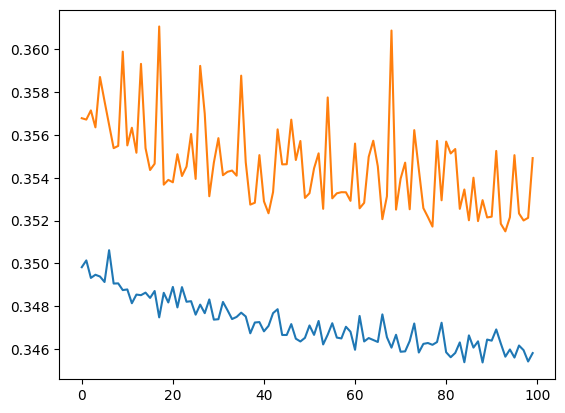

In [120]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

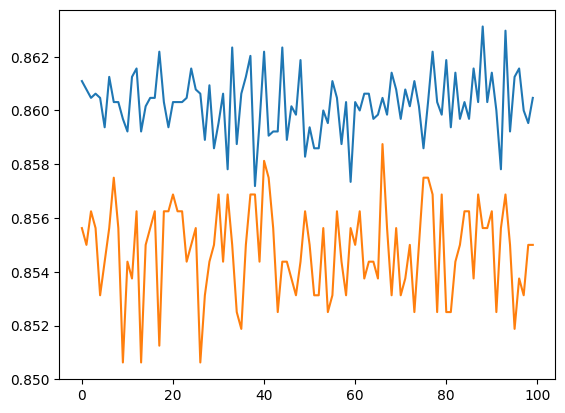

In [121]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])